# Data Exploration - Hanoi Weather Forecasting

## Step 2: Data Understanding & Analysis

This notebook explores the Hanoi weather dataset with **33 features** over 10 years to understand:

### 🎯 Objectives:
1. **Analyze all 33 columns** - Understand meaning and value ranges
2. **Temperature Analysis** - Plot Hanoi temperature trends over 10 years
3. **Feature Relationships** - Compute correlations and dependencies
4. **Forecasting Insights** - How features combine to predict temperature
5. **Data Quality Assessment** - Missing values, outliers, data types

### 📊 Dataset Overview:
- **Source**: `data/raw/Hanoi-Daily-10-years.csv`
- **Features**: 33 columns including temperature, weather conditions, atmospheric data
- **Target**: `temp` (average daily temperature)
- **Time Range**: 10 years of daily weather data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

print("📊 Libraries loaded successfully!")
print("🎯 Ready to explore Hanoi weather data with 33 features")

📊 Libraries loaded successfully!
🎯 Ready to explore Hanoi weather data with 33 features


## 1. Load and Inspect the Data

In [2]:
# Load the Hanoi weather dataset
data_path = '../data/raw/Hanoi-Daily-10-years.csv'
df = pd.read_csv(data_path)

print(f"📋 Dataset Shape: {df.shape}")
print(f"📅 Date Range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"🌡️ Temperature Range: {df['temp'].min():.1f}°C to {df['temp'].max():.1f}°C")
print(f"📊 Total Features: {len(df.columns)} columns")

# Display first few rows
print("\n📖 First 5 rows:")
df.head()

📋 Dataset Shape: (3660, 33)
📅 Date Range: 1/1/2016 to 9/9/2025
🌡️ Temperature Range: 7.0°C to 35.5°C
📊 Total Features: 33 columns

📖 First 5 rows:


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,9/20/2015,33.0,26.7,29.3,41.7,30.5,35.4,25.7,81.5,...,12.2,5,NaN,2015-09-20T05:44:39,2015-09-20T17:55:33,0.23,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,9/21/2015,29.5,25.0,26.8,34.4,25.0,29.2,24.3,86.3,...,5.8,3,NaN,2015-09-21T05:44:54,2015-09-21T17:54:36,0.25,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,9/22/2015,28.5,25.0,25.9,32.8,25.0,26.5,24.2,90.5,...,7.2,3,NaN,2015-09-22T05:45:08,2015-09-22T17:53:39,0.30,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"48820099999,48823099999,48825099999,4883109999..."
3,Hanoi,9/23/2015,31.3,25.5,28.0,39.7,25.5,32.0,25.4,86.2,...,12.1,5,NaN,2015-09-23T05:45:23,2015-09-23T17:52:42,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,Hanoi,9/24/2015,34.5,26.5,29.9,43.5,26.5,36.4,25.9,80.4,...,19.5,8,NaN,2015-09-24T05:45:38,2015-09-24T17:51:45,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"48820099999,48823099999,48825099999,4883109999..."


## 2. Comprehensive Feature Analysis

### 🔍 Understanding All 33 Columns

In [3]:
# Column information and data types
print("📊 Column Information:")
print(f"Total columns: {len(df.columns)}")
print("\nColumns list:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n🔍 Data Types:")
df.dtypes

📊 Column Information:
Total columns: 33

Columns list:
 1. name
 2. datetime
 3. tempmax
 4. tempmin
 5. temp
 6. feelslikemax
 7. feelslikemin
 8. feelslike
 9. dew
10. humidity
11. precip
12. precipprob
13. precipcover
14. preciptype
15. snow
16. snowdepth
17. windgust
18. windspeed
19. winddir
20. sealevelpressure
21. cloudcover
22. visibility
23. solarradiation
24. solarenergy
25. uvindex
26. severerisk
27. sunrise
28. sunset
29. moonphase
30. conditions
31. description
32. icon
33. stations

🔍 Data Types:


name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [4]:
# Detailed feature analysis with explanations
feature_explanations = {
    # Basic Info
    'name': 'Location name (Hanoi)',
    'datetime': 'Date in YYYY-MM-DD format',
    'stations': 'Weather station IDs used for data collection',
    
    # Temperature Features (Target & Related)
    'temp': '🎯 TARGET: Average daily temperature (°C)',
    'tempmax': 'Maximum daily temperature (°C)',
    'tempmin': 'Minimum daily temperature (°C)',
    'feelslike': 'Average "feels like" temperature (°C)',
    'feelslikemax': 'Maximum "feels like" temperature (°C)',
    'feelslikemin': 'Minimum "feels like" temperature (°C)',
    'dew': 'Dew point temperature (°C)',
    
    # Atmospheric Conditions
    'humidity': 'Relative humidity (%)',
    'sealevelpressure': 'Sea level atmospheric pressure (hPa)',
    'cloudcover': 'Cloud coverage (%)',
    'visibility': 'Visibility distance (km)',
    
    # Precipitation
    'precip': 'Total precipitation (mm)',
    'precipprob': 'Probability of precipitation (%)',
    'precipcover': 'Precipitation coverage (%)',
    'preciptype': 'Type of precipitation (rain, snow, etc.)',
    'snow': 'Snow amount (mm)',
    'snowdepth': 'Snow depth (mm)',
    
    # Wind
    'windspeed': 'Average wind speed (km/h)',
    'windgust': 'Maximum wind gust speed (km/h)',
    'winddir': 'Wind direction (degrees, 0-360)',
    
    # Solar & UV
    'solarradiation': 'Solar radiation (W/m²)',
    'solarenergy': 'Solar energy (MJ/m²)',
    'uvindex': 'UV index (0-11 scale)',
    
    # Time-based
    'sunrise': 'Sunrise time',
    'sunset': 'Sunset time',
    'moonphase': 'Moon phase (0=new moon, 0.5=full moon, 1=new moon)',
    
    # Risk & Conditions
    'severerisk': 'Severe weather risk level',
    'conditions': 'Weather condition summary (text)',
    'description': 'Detailed weather description (text)',
    'icon': 'Weather icon identifier'
}

print("📖 Feature Explanations:")
print("=" * 60)
for feature, explanation in feature_explanations.items():
    if feature in df.columns:
        print(f"• {feature:20s}: {explanation}")
print("=" * 60)

📖 Feature Explanations:
• name                : Location name (Hanoi)
• datetime            : Date in YYYY-MM-DD format
• stations            : Weather station IDs used for data collection
• temp                : 🎯 TARGET: Average daily temperature (°C)
• tempmax             : Maximum daily temperature (°C)
• tempmin             : Minimum daily temperature (°C)
• feelslike           : Average "feels like" temperature (°C)
• feelslikemax        : Maximum "feels like" temperature (°C)
• feelslikemin        : Minimum "feels like" temperature (°C)
• dew                 : Dew point temperature (°C)
• humidity            : Relative humidity (%)
• sealevelpressure    : Sea level atmospheric pressure (hPa)
• cloudcover          : Cloud coverage (%)
• visibility          : Visibility distance (km)
• precip              : Total precipitation (mm)
• precipprob          : Probability of precipitation (%)
• precipcover         : Precipitation coverage (%)
• preciptype          : Type of precipitati

### 🌙 Special Focus: Moonphase Analysis

**Moonphase values explanation:**
- **0.0**: New Moon (darkest)
- **0.25**: First Quarter
- **0.5**: Full Moon (brightest)
- **0.75**: Last Quarter
- **1.0**: New Moon (cycle repeats)

🌙 Moonphase Analysis:
Range: 0.000 to 0.980
Unique values: 96


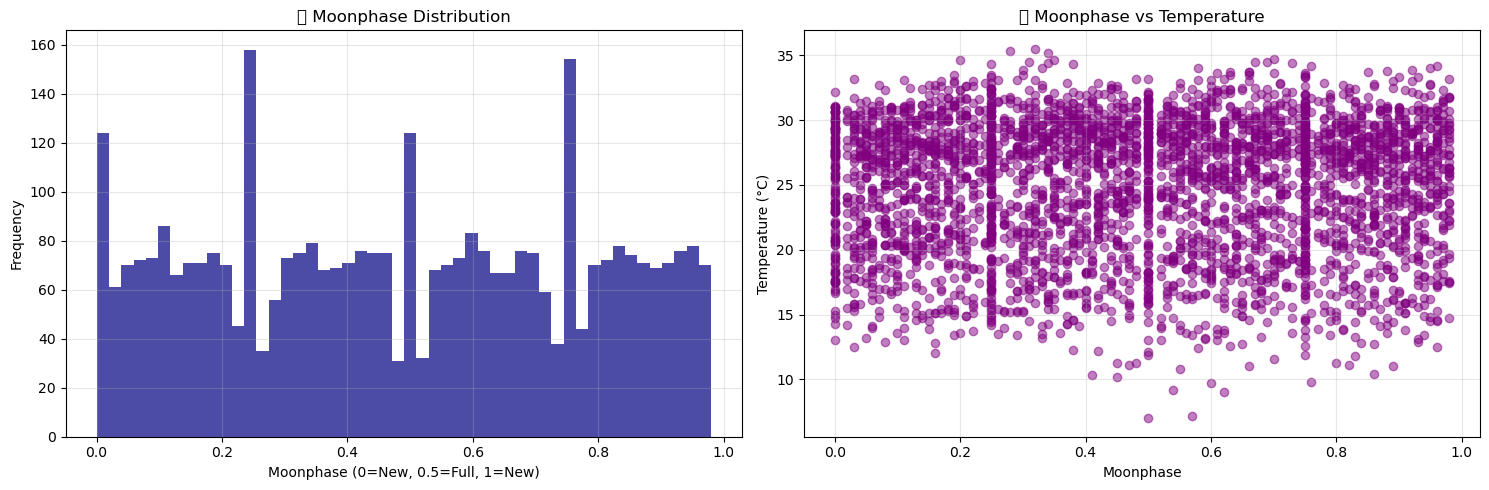


🔗 Moonphase-Temperature Correlation: 0.0094


In [5]:
# Analyze moonphase feature in detail
print("🌙 Moonphase Analysis:")
print(f"Range: {df['moonphase'].min():.3f} to {df['moonphase'].max():.3f}")
print(f"Unique values: {df['moonphase'].nunique()}")

# Moonphase distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(df['moonphase'], bins=50, alpha=0.7, color='navy')
ax1.set_title('🌙 Moonphase Distribution')
ax1.set_xlabel('Moonphase (0=New, 0.5=Full, 1=New)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Moonphase vs Temperature
ax2.scatter(df['moonphase'], df['temp'], alpha=0.5, color='purple')
ax2.set_title('🌙 Moonphase vs Temperature')
ax2.set_xlabel('Moonphase')
ax2.set_ylabel('Temperature (°C)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation between moonphase and temperature
moonphase_temp_corr = df['moonphase'].corr(df['temp'])
print(f"\n🔗 Moonphase-Temperature Correlation: {moonphase_temp_corr:.4f}")